In [2]:
from qiskit.circuit.random import random_circuit
from qiskit import QuantumCircuit

# Create a random circuit. Params, n_qubits = 5, depth = 4
qc = random_circuit(5, 4, measure=True)
qc.draw(output='clifford')


VisualizationError: 'Invalid output type clifford selected. The only valid choices are text, latex, latex_source, and mpl'

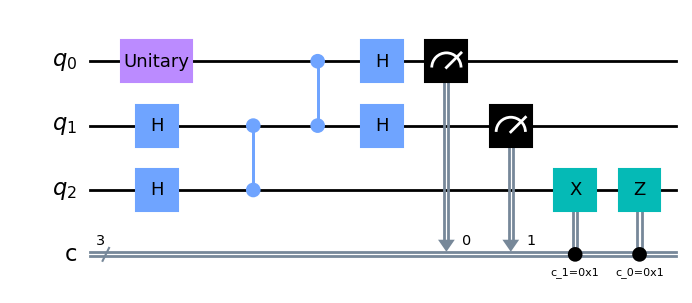

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.quantum_info import random_unitary

# Create a quantum teleportation circuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)
unitary = random_unitary(2)
qc.unitary(unitary, q[0])
qc.h(q[1])
qc.h(q[2])
qc.cz(q[1], q[2])
qc.cz(q[0], q[1])
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

qc.x(q[2]).c_if(c[1], 1)
qc.z(q[2]).c_if(c[0], 1)

qc.unitary(unitary.adjoint(), q[2])
qc.measure(q[2], c[2])

qc.draw(output='mpl')



In [24]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists[0]
fidelity = counts.get(0, 0) + counts.get(1, 0) + counts.get(2, 0) + counts.get(3, 0)
fidelity /= sum(counts.values())
print('Fidelity =', fidelity)

Fidelity = 1.0
